# Milikan Oil Drop Experiment

###### Nathaniel Flower and Chelsey McMichael

# Abstract


In this experiment, we measured the charge of an electron through the Milikan oil-drop experiment. The charge what determined to be -2.352710315844826e-21 C. Compared to the anaytical value of the charge, there was a percent difference of 

# Introduction

In 1909, Robert A. Milikan determined the fundamental charge e through the Milikan oil-drop experiment because each individual oil drop had a balanced electric and gravitational force. Milikan wanted to determine whether electrical charges occurred in discrete units, once he determined this to be fact, he determined the value of the elementary charged.  

# Procedure

In this experiment, we substituted latex spheres in the place of the oil drops of the original apparatus. These latex spheres travel through the latex spray hole and these spheres are charged moving vertically between two metal plates. To view these spheres, we had to observe them through the microscope as the illuminator shined through the light beam opening to illuminate the spheres. 

<img src="./assets/device.jpg">
###### Figure 1. Milikan Oil-Drop Apparatus

When the 300 V voltage was not applied, the polarity reversing switch was off in the midposition. We observed the spheres falling and recorded the time it took for a sphere to free fall betweem two segments under the force of gravity. When the voltage was turned on, we switched the polarity reversing switch either up or down to make the sphere rise or fall with an added electric force. This time taken for it to rise or fall was also recorded. Recording this information allows us to calculate the charge of the particle. 

<img src="./assets/inside.jpg">
###### Figure 2. Latex Spheres Travelling Between 0.05 mm Segments

In [2]:
# Nathaniel (describe the timer)

# Data

**Trial**|**Rise**|**Fall**|**Free Fall**
:-----:|:-----:|:-----:|:-----:
1| | |8.212843895
2| | |10.89744306
3| | |2.856066942
4|2.432384729| | 
5|1.66163516| | 
6| | |7.881625175
7| | |1.738971472
8| | |14.39264631
9| | |1.713270664
10| |1.79573369| 
11|1.01055789| | 
12|2.523465633| | 
13|1.455188513| | 
14| | |9.472488403
15| | |10.55353975
16|1.959552526| | 
17| |0.897855282| 
18|0.974456072| | 
19|1.599865675| | 
20| |1.058858633| 
21| | |3.874842167
22| |0.538098097| 
23| | |2.326050282
24|1.210013866| | 
25| | |1.782615185
26| |0.994503975| 
27|1.645473957| | 
28| |0.83839488| 
29|1.223428249| | 
30| | |3.618525267
31|0.400490284|0.770166636| 
32|0.331391335|0.616934538| 
33| |0.532225847| 
34|0.169258833|0.316095591| 
35|0.847942829| | 
36|1.169527054| | 
37|0.884941578|0.96906352| 
38| |0.938575268| 
39|1.105657101|1.454652786| 
40| |1.101102591| 
41| |5.906097889| 
42| |0.454192638| 
43| |2.631916285| 
44|0.904268742|0.684141159| 
45|2.124335766|2.101639748| 
46| |0.970880985| 
47|1.399701118|0.969271898| 
48| |0.700464964| 
49|1.387429237|0.716257572| 
50| |0.716619015| 
51| |1.229087591| 
52|0.984875917|0.801284075| 
53|1.070526361|1.216011047| 
54|1.03263998| | 
55| |1.470393419| 
56| |0.798036814| 
57|1.602308035|1.200989723| 
58|1.580104828|0.717149973| 
59| |0.936168671| 
60|0.831620693|0.654384375| 
61| |0.96446991| 
62|0.81596303|0.816253662| 
63|1.647096872|1.601362705| 
64|1.400588512|1.285666943| 
65|1.325311184|0.762620449| 
66|1.564141512|1.839228392| 
67|1.148337126|0.838251591| 
68|1.269977331|0.88106966| 
69|0.647604942|0.604474545| 
70|2.523132086|2.218057394| 
71|1.255136728|1.237900972| 
72|0.949555159|1.251529694| 
73|1.154421806|0.970658064| 
74|0.485418081|0.600871086| 
75|0.919658899|0.753614664| 
76|0.922494173|0.854334593| 
77|2.234569073|1.163942575| 
78|1.38589263|1.217462301| 
79|1.05444479| | 
80|0.93244338|0.854021311| 
81|1.400674105|0.953438759| 
82|1.232452631|0.685162783| 
83|1.451907635|0.969392776| 
84|1.070380449|1.353893518| 
85|1.148137331|0.884811401| 
86|1.201933622|0.754033804| 
87|1.185611486|0.731754541| 
88| |1.14837122| 
89|1.701943398|1.369336843| 
90|0.963834286|0.762876511| 
91|1.001801968|0.800737619| 

# Calculations

In [64]:
import math
from astropy.io import ascii
import numpy as np
from scipy.stats import expon
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline

def f(velocity_step):
    eta = 1.8e-5
    radius = 5.5e-7
    voltage = 300
    distance_between_plates = 5e-3
    return 3*math.pi*eta*radius*distance_between_plates*velocity_step/voltage 

raw = ascii.read("oildrop_data_nf_cm.csv")
raw['Rise'].fill_value = 0
raw['Fall'].fill_value = 0
filled = raw.filled()
data = []
distance = .05 /1000
for i in range(len(filled['Fall'])):
    if filled['Fall'][i] and filled['Rise'][i]:
        val = distance/filled['Fall'][i] - distance/filled['Rise'][i]
        if val > 0:
            data.append(val)


Basic charge calculation: 2.190765610093086e-20 C
Slightly more sophisticated charge calculation: -2.352710315844826e-21 C


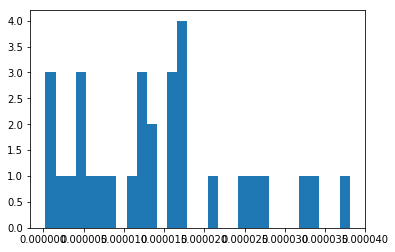

In [99]:
a=plt.hist(data, histtype='stepfilled', bins = 30)
avg_fall = sum(data)/len(data)
print("Basic charge calculation: {} C".format(f(avg_fall)))
temp = []
val = []
for t in range(len(a[0])):
    if a[0][t]:
        val.append(a[1][t])
#print(val)
for j in range(0, len(val)//2, 2):
    temp.append(f(val[j]-val[j+1]))
print("Slightly more sophisticated charge calculation: {} C".format(sum(temp)/len(temp)))

# Conclusion

In [3]:
# Nathan

# References

Operating Instructions Manual 

Milikan Apparatus Model TM-15 Instruction Manual

Serway, R. A., Moses, C. J., & Moyer, C. A. (2004). Modern Physics (3rd ed.). 